In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as  plt
%matplotlib inline

In [2]:
img = cv2.imread(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\test images\sharapova1.jpg")
img.shape

(555, 700, 3)

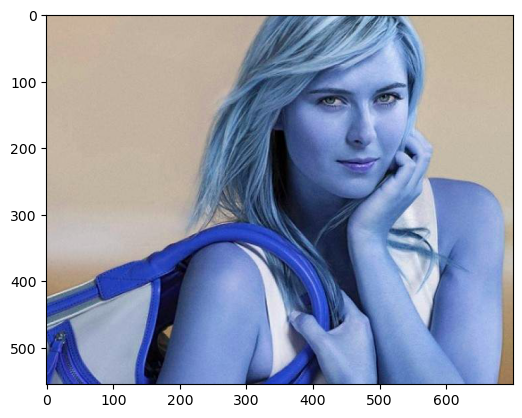

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

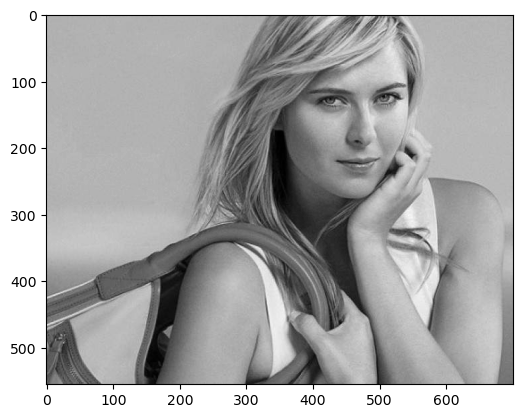

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\openCV_harcascade\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\openCV_harcascade\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces  # it is returning x , y, width, height

array([[352,  38, 233, 233]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

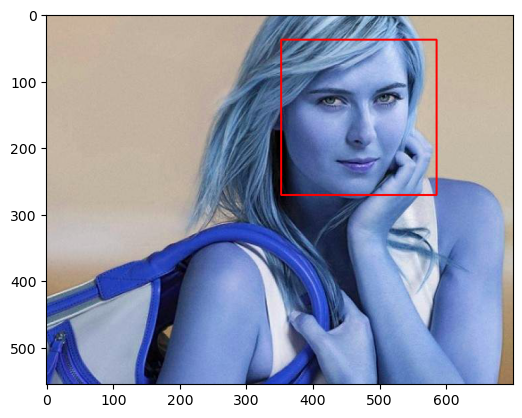

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

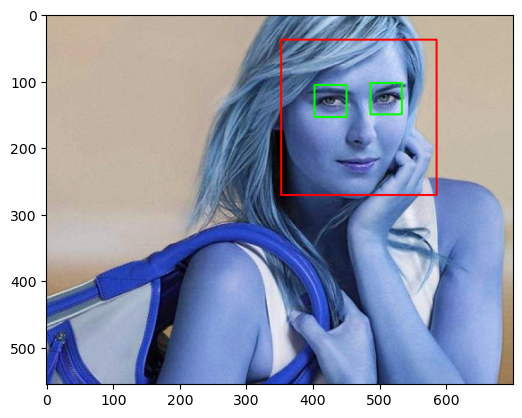

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
    

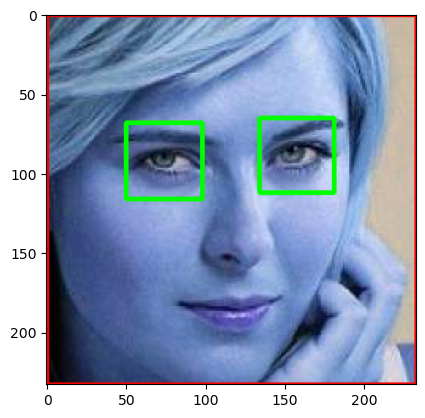

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
#function for cropped image
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))


    print(f"Faces detected: {len(faces)}")  # Debug line to check the number of faces
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None


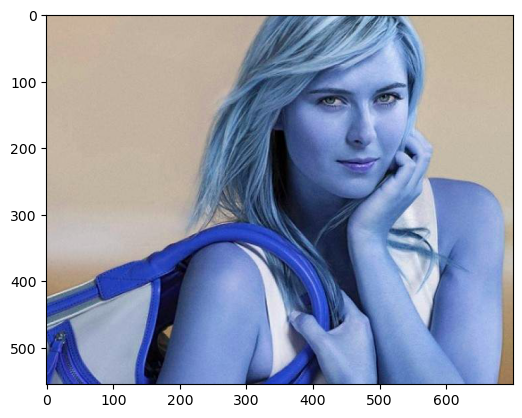

In [13]:
original_image = cv2.imread(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\test images\sharapova1.jpg")
plt.imshow(original_image)

Faces detected: 1


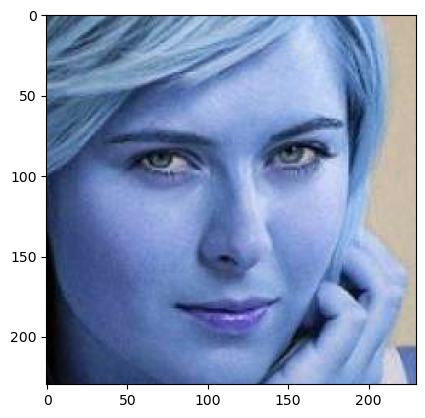

In [14]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\test images\sharapova1.jpg")
plt.imshow(cropped_image)

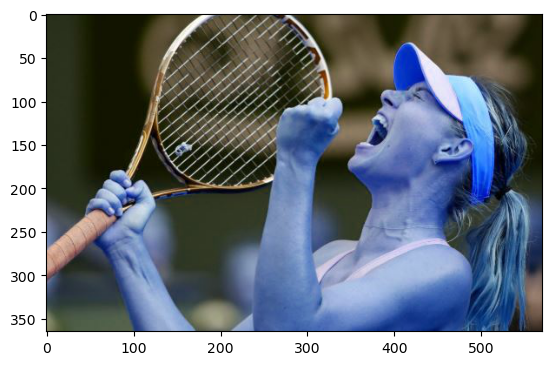

In [15]:
org_image_obstructed = cv2.imread(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\test images\sharapova2.JPG")
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\test images\sharapova2.JPG")
cropped_image_no_2_eyes  #we will gwt nothing on running, ie face is obstructed

Faces detected: 1


In [17]:
path_to_data = r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset"
path_to_cr_data= r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped"

In [18]:
import os

path_to_data = r'C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset'
img_dirs = []

if os.path.exists(path_to_data):
    for entry in os.scandir(path_to_data):
        if entry.is_dir():  # Check if it's a directory
            img_dirs.append(entry.path)

    print("Subdirectories found:")
    for dir in img_dirs:
        print(dir)
else:
    print(f"Directory does not exist: {path_to_data}")


Subdirectories found:
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\lionel_messi
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\maria_sharapova
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\roger_federer
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\serena_williams
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\virat


In [19]:
img_dirs = []

if os.path.exists(path_to_data):
    for entry in os.scandir(path_to_data):
        if entry.is_dir() and entry.name != 'cropped':  # Exclude 'cropped'
            img_dirs.append(entry.path)

    print("Subdirectories for processing:")
    for dir in img_dirs:
        print(dir)
else:
    print(f"Directory does not exist: {path_to_data}")


Subdirectories for processing:
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\lionel_messi
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\maria_sharapova
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\roger_federer
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\serena_williams
C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\virat


In [39]:
import os
import cv2

# Define paths
path_to_data = r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset"
path_to_cr_data = r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped"

# Initialize dictionary for storing file paths
celebrity_file_names_dict = {}

# Define absolute paths for Haar cascades
face_cascade_path = r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\openCV_harcascade\haarcascade_frontalface_default.xml"
eye_cascade_path = r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\openCV_harcascade\haarcascade_eye.xml"

# Load Haar cascade classifiers
face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

# Function to detect faces and eyes, then crop the image
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) >= 2:  # Ensure that at least two eyes are detected
            return roi_color
    return None

# Process each subdirectory (celebrity folder)
for img_dir in os.scandir(path_to_data):
    if img_dir.is_dir():
        count = 1
        celebrity_name = img_dir.name  # Extract the last part of the path (celebrity name)
        print(f"Processing images for {celebrity_name}")

        celebrity_file_names_dict[celebrity_name] = []  # Initialize list for this celebrity

        # Create a folder for cropped images if it doesn't exist
        cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
        if not os.path.exists(cropped_folder):
            os.makedirs(cropped_folder)
            print(f"Generating cropped images in folder: {cropped_folder}")

        # Process each image in the celebrity's folder
        for entry in os.scandir(img_dir.path):
            if entry.is_file() and entry.name.endswith(('.jpg', '.jpeg', '.png')):
                roi_color = get_cropped_image_if_2_eyes(entry.path)
                if roi_color is not None:
                    cropped_file_name = f"{celebrity_name}{count}.png"
                    cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                    
                    # Save the cropped image
                    cv2.imwrite(cropped_file_path, roi_color)
                    celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                    print(f"Saved cropped image: {cropped_file_path}")
                    count += 1

print("Processing complete!")


Processing images for cropped
Processing images for lionel_messi
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped\lionel_messi\lionel_messi1.png
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped\lionel_messi\lionel_messi2.png
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped\lionel_messi\lionel_messi3.png
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped\lionel_messi\lionel_messi4.png
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped\lionel_messi\lionel_messi5.png
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\images_dataset\cropped\lionel_messi\lionel_messi6.png
Saved cropped image: C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_

**Wavelet transform**

In [40]:
import sys
print(sys.executable)


C:\Users\AYUSHI SHAHI\.conda\envs\myenv\python.exe


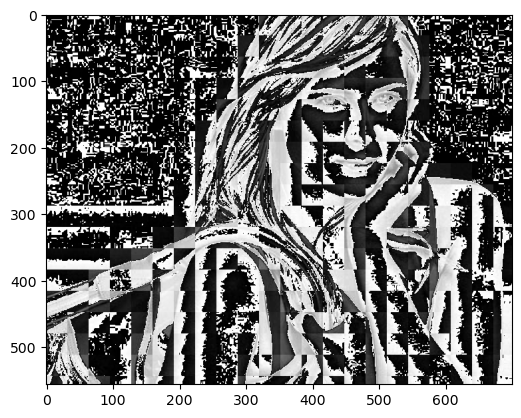

In [53]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt

def w2d(img, mode='haar', level=1):
    imArray = img
    # datatype conversions
    # convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

# Assuming `cropped_image` is a valid image
cropped_image = cv2.imread(r"C:\Users\AYUSHI SHAHI\OneDrive\Documents\ML_Projects\Face recognition\model\test images\sharapova1.jpg")  # Use the correct image path
im_har = w2d(cropped_image, 'db1', 5)

# Display the image
plt.imshow(im_har, cmap='gray')
plt.show()  # Ensure to call plt.show() to render the plot



In [55]:
print(type(celebrity_file_names_dict))
print(celebrity_file_names_dict)


<class 'dict'>
{'cropped': [], 'lionel_messi': ['C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi1.png', 'C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi2.png', 'C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi3.png', 'C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi4.png', 'C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi5.png', 'C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi6.png', 'C:\\Users\\AYUSHI SHAHI\\OneDrive\\Documents\\ML_Projects\\Face recognition\\images_dataset\\cropped\\lionel_messi\\lionel_messi7

In [57]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
print(class_dict)


{'cropped': 0, 'lionel_messi': 1, 'maria_sharapova': 2, 'roger_federer': 3, 'serena_williams': 4, 'virat': 5}


In [61]:
X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har= cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [62]:
len(X)  #each element in the folder of cropped images in toatl

116

In [65]:
len(X[0])

4096

In [67]:
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(116, 4096)

In [69]:
X[0]

array([ 12.,  14.,   5., ..., 207., 204., 208.])

**Data cleaning process is done. Now we are ready to train our model**

we will use SVM with rbf kernel with heuristic finetuning

In [73]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6551724137931034

In [87]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           2       1.00      0.75      0.86         4
           3       0.50      0.75      0.60         4
           4       0.80      0.67      0.73         6
           5       0.57      1.00      0.73         8

    accuracy                           0.66        29
   macro avg       0.77      0.66      0.63        29
weighted avg       0.77      0.66      0.61        29



**lets use gridSearch to try out different models with different parameters. Goal is to come up with best modle with best fine tuned parameters**

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define your pipeline
pipe = Pipeline([
    ('standardscaler', StandardScaler()),
    ('svm', SVC(gamma='auto', probability=True))
])

# Define your parameter grid with correct step names
params = {
    'svm__C': [1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Set up GridSearchCV
clf = GridSearchCV(pipe, params, cv=5, return_train_score=False)

# Fit the model
clf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svm',
                                        SVC(gamma='auto', probability=True))]),
             param_grid={'svm__C': [1, 10], 'svm__kernel': ['linear', 'rbf']})

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'X_train' and 'y_train' are already defined
scores = []
best_estimators = {}

model_params = {
    'svm': {
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'svm__C': [1, 10, 100, 1000],
            'svm__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'random_forest__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logistic_regression__C': [1, 5, 10]
        }
    }
}

# Loop through models in the dictionary
for algo, config in model_params.items():
    # Create a pipeline with dynamic model steps
    pipe = Pipeline([
        ('standardscaler', StandardScaler()),
        (algo, config['model'])  # Use the algorithm's name as the step
    ])
    
    # Perform GridSearchCV with cross-validation and the model's parameter grid
    clf = GridSearchCV(pipe, config['params'], cv=5, return_train_score=False)
    
    # Fit the model using GridSearchCV
    clf.fit(X_train, y_train)

    # Store the results in the scores list
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    # Store the best estimator for each model
    best_estimators[algo] = clf.best_estimator_

# Convert the scores list to a DataFrame for easy viewing
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)


C:\Users\AYUSHI SHAHI\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\AYUSHI SHAHI\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\AYUSHI SHAHI\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\AYUSHI SHAHI\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py

                 model  best_score                             best_params
0                  svm    0.677124  {'svm__C': 1, 'svm__kernel': 'linear'}
1        random_forest    0.587582     {'random_forest__n_estimators': 10}
2  logistic_regression    0.678431           {'logistic_regression__C': 1}


In [134]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svm',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('random_forest',
                  RandomForestClassifier(n_estimators=10, random_state=42))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logistic_regression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [136]:
best_estimators['svm'].score(X_test, y_test)

0.6551724137931034

In [138]:
best_estimators['random_forest'].score(X_test, y_test)

0.6206896551724138

In [142]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6551724137931034

In [144]:
best_clf = best_estimators['svm']

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 2, 0, 2],
       [0, 4, 0, 0, 0],
       [1, 0, 2, 1, 0],
       [0, 0, 1, 4, 1],
       [0, 1, 0, 1, 6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

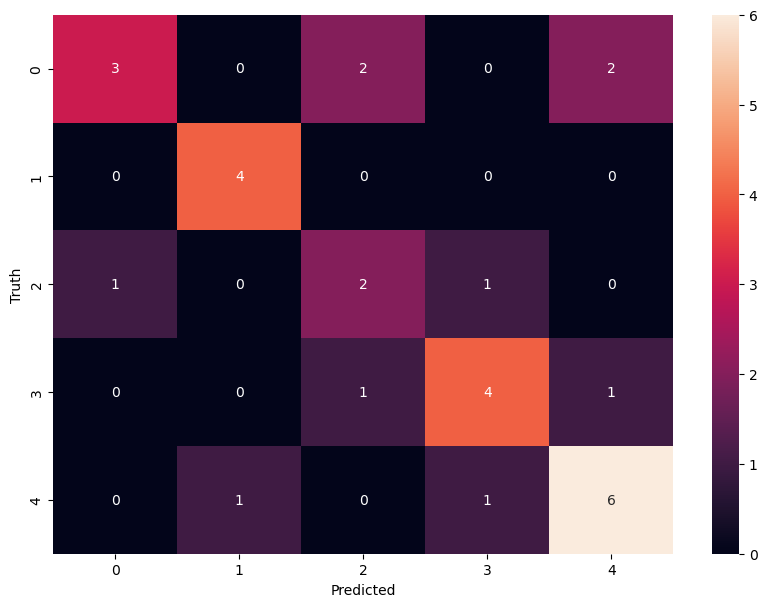

In [148]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [150]:
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat': 5}

**Save the trained model**

In [152]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

**Save class dictionary**

In [158]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))